**Install opendatasets**

In [2]:
!pip install opendatasets -q

**Import modules**

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import opendatasets as od

**Download dataset**

In [5]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Skipping, found downloaded files in "./cats-and-dogs-for-classification" (use force=True to force download)


In [6]:
BATCH_SIZE = 32
IMAGE_SIZE =(128,128)

In [7]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)
validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [8]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [9]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)


(32, 128, 128, 3)
(32,)


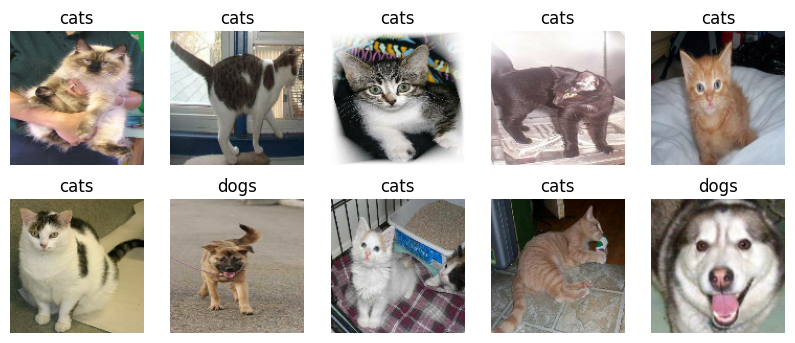

In [10]:

# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(2):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')


In [11]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

**Scaling the dataset**

In [12]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [13]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [14]:
!pip install tensorflow==2.9.1

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

pretrained_model = VGG16(include_top= False,##model is trained for 1000 classes, but here we use binary class problem. so we do not need the top layer
                                                           input_shape = (128,128,3),
                                                           weights = "imagenet",
                                                           pooling = "max" )

for layer in pretrained_model.layers:
  layer.trainable = False

**Model build**

In [16]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation = "relu"))
model.add(tf.keras.layers.Dense(units=128, activation = "relu"))
model.add(tf.keras.layers.Dense(units=32, activation = "relu"))
model.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,801,025
Trainable params: 86,337
Non-tr

In [18]:
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

**Model traning**

In [19]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=3,
                    validation_data = validation_data)

end_time = time.time()

Epoch 1/3
225/225 [==============================] - 1622s 7s/step - loss: 0.3824 - accuracy: 0.8190 - val_loss: 0.3150 - val_accuracy: 0.8650
Epoch 2/3
225/225 [==============================] - 1579s 7s/step - loss: 0.2913 - accuracy: 0.8726 - val_loss: 0.3305 - val_accuracy: 0.8587
Epoch 3/3
225/225 [==============================] - 1591s 7s/step - loss: 0.2714 - accuracy: 0.8789 - val_loss: 0.2754 - val_accuracy: 0.8750


**Performance analisis**

In [1]:
fig = plt.figure()
plt.plot(history.history['loss'],color= 'teal',label = 'loss')
plt.plot(history.history['val_loss'],color= 'orange',label = 'val_loss')
fig.suptitle('loss',fontsize= 20)
plt.legend(loc = "upper left")
plt.show()


NameError: name 'plt' is not defined

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color= 'teal',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color= 'orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize= 20)
plt.legend(loc = "upper left")
plt.show()


In [ ]:


precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()


for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)



In [ ]:
precision.result()

In [ ]:
recall.result()

In [ ]:
accuracy.result()

**VGG19**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19

pretrained_model = VGG19(include_top= False,##model is trained for 1000 classes, but here we use binary class problem. so we do not need the top layer
                                                           input_shape = (128,128,3),
                                                           weights = "imagenet",
                                                           pooling = "max" )

for layer in pretrained_model.layers:
  layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation = "relu"))
model.add(tf.keras.layers.Dense(units=128, activation = "relu"))
model.add(tf.keras.layers.Dense(units=32, activation = "relu"))
model.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])


import time
start_time = time.time()

history = model.fit(train_data,
                    epochs=3,
                    validation_data = validation_data)

end_time = time.time()